<a href="https://colab.research.google.com/github/yubin8773/2021-deep-learning/blob/main/Keras_5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#기본적인 간단한 컨브넷(함성곱 신경망)
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [4]:
#컨브넷 위에 분류기 추가/ 마지막층의 ((3,3,64크기인) 출력텐서를 완전연결 네트워크에 주입)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [6]:
#MNIST 이미지에 컨브넷 훈련하기
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 47s 4ms/step - loss: 0.3939 - accuracy: 0.8739
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0481 - accuracy: 0.9851
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0338 - accuracy: 0.9891
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0240 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0189 - accuracy: 0.9943


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0257 - accuracy: 0.9916


In [9]:
test_acc

0.991599977016449

In [10]:
#훈련 ,검증, 테스트 폴더로 이미지 복사하기
import os, shutil

#원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = '/content/drive/MyDrive/dataset/dogs-vs-cats/train'

#소규모 데이터셋을 저장할 디렉터리
base_dir = '/content/drive/MyDrive/dataset/dogs-vs-cats_small'
os.mkdir(base_dir)

#훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

#훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

#훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

#검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

#검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

#테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

#테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

#처음 1000개의 고양이 이미지를 train_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

#다음 500개의 고양이 이미지를 validation_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
#다음 500개의 고양이 이미지를 test_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000   )]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
#처음 1000개의 강아지 이미지를 train_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
#다음 500개의 강아지 이미지를 validation_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
#다음 500개의 강아지 이미지를 test_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
print("훈련용 고양이 이미지 개수:", len(os.listdir(train_cats_dir)))
print("훈련용 강아지 이미지 개수:", len(os.listdir(train_dogs_dir)))
print("검증용 고양이 이미지 개수:", len(os.listdir(validation_cats_dir)))
print("검증용 강아지 이미지 개수:", len(os.listdir(validation_dogs_dir)))
print("테스트용 고양이 이미지 개수:", len(os.listdir(test_cats_dir)))
print("테스트용 강아지 이미지 개수:", len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 개수: 1000
훈련용 강아지 이미지 개수: 1000
검증용 고양이 이미지 개수: 500
검증용 강아지 이미지 개수: 500
테스트용 고양이 이미지 개수: 500
테스트용 강아지 이미지 개수: 500


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [12]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', 
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)      

In [14]:
from keras import optimizers

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


사진 파일을 읽고 JPEG 콘텐츠를 RGB픽셀 값으로 디코딩한 후 부동소수 타입의 텐서로 변환한다. 그 다음 픽셀값의(0~255사이) 스케일을 [0,1] 사이로 조정한다.

=>복잡해 보이지만 케라스에는 이를 위한 유틸리티가 있고 ImageDataGenerator를 사용할 수도 있다

In [15]:
#ImageDataGenerator를 이용해 디렉터리에서 이미지 읽기
from keras.preprocessing.image import ImageDataGenerator

#모든 이미지를 1/255로 스케일 조정한다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), #모든 이미지를 150x150크기로 바꾼다
    batch_size=20, class_mode = 'binary') #binary_crossentropy를 사용하기에 이진 레이블 필요

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150), 
    batch_size = 20, 
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [17]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100, 
    epochs=30, 
    validation_data=validation_generator, 
    validation_steps=50)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 14s 121ms/step - loss: 0.6995 - acc: 0.5131 - val_loss: 0.6750 - val_acc: 0.5010
Epoch 2/30
100/100 [==============================] - 12s 116ms/step - loss: 0.6612 - acc: 0.6170 - val_loss: 0.6419 - val_acc: 0.6140
Epoch 3/30
100/100 [==============================] - 11s 113ms/step - loss: 0.5979 - acc: 0.6907 - val_loss: 0.6009 - val_acc: 0.6730
Epoch 4/30
100/100 [==============================] - 11s 114ms/step - loss: 0.5682 - acc: 0.7166 - val_loss: 0.5901 - val_acc: 0.6870
Epoch 5/30
100/100 [==============================] - 12s 121ms/step - loss: 0.5455 - acc: 0.6977 - val_loss: 0.6003 - val_acc: 0.6810
Epoch 6/30
100/100 [==============================] - 12s 122ms/step - loss: 0.5239 - acc: 0.7254 - val_loss: 0.5794 - val_acc: 0.6910
Epoch 7/30
100/100 [==============================] - 11s 114ms/step - loss: 0.5032 - acc: 0.7518 - val_loss: 0.5518 - val_acc: 0.7120
Epoch 8/30
100/100 [==============================] - 1

In [18]:
#모델 저장하기
model.save('cats_and_dogs_small_1.h5')

<function matplotlib.pyplot.show>

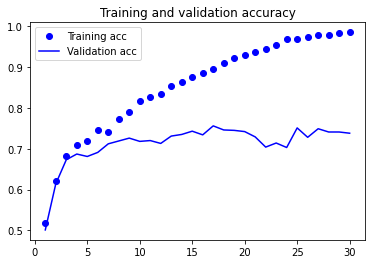

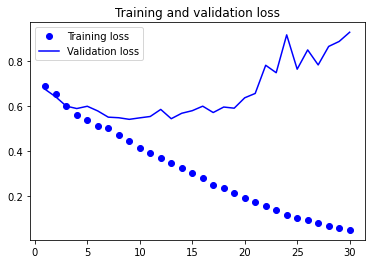

In [19]:
#훈련정확도와 손실 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show

In [20]:
#imageDataGenerator를 사용해 데이터 증식 설정
datagen = ImageDataGenerator(rotation_range=20, 
                             width_shift_range=0.1, 
                             height_shift_range=0.1, 
                             shear_range=0.1, 
                             zoom_range=0.1, 
                             horizontal_flip=True, 
                             fill_mode='nearest')

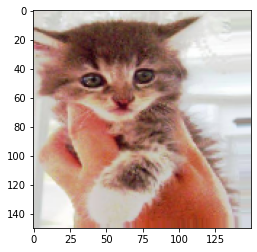

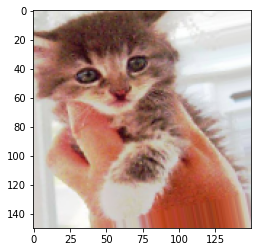

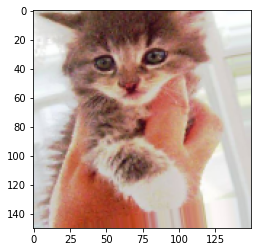

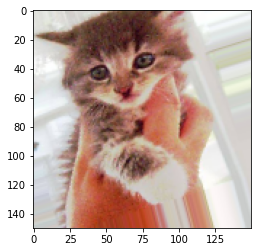

In [21]:
#랜덤하게 증식된 훈련 이미지 그리기
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for
                fname in os.listdir(train_cats_dir)])
img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break
plt.show()

In [22]:
#드롭아웃을 포함한 새로운 컨브넷 정의
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', 
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [23]:
#데이터 증식 제너레이터를 이용해 컨브넷 훈련
train_datagen = ImageDataGenerator( 
    rescale = 1./255, 
    rotation_range = 40, 
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    shear_range = 0.2, 
    zoom_range = 0.2, 
    horizontal_flip = True,)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size = (150, 150), 
    batch_size = 32, 
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size = (150, 150), 
    batch_size = 32, 
    class_mode = 'binary')

history = model.fit_generator(
    train_generator, 
    steps_per_epoch=train_generator.n//train_generator.batch_size, 
    epochs = 100, 
    validation_data = validation_generator, 
    validation_steps=validation_generator.n//validation_generator.batch_size)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
62/62 [==============================] - 23s 334ms/step - loss: 0.7003 - acc: 0.4917 - val_loss: 0.6912 - val_acc: 0.5000
Epoch 2/100
62/62 [==============================] - 20s 328ms/step - loss: 0.6912 - acc: 0.5297 - val_loss: 0.6725 - val_acc: 0.5685
Epoch 3/100
62/62 [==============================] - 19s 311ms/step - loss: 0.6817 - acc: 0.5496 - val_loss: 0.6815 - val_acc: 0.5373
Epoch 4/100
62/62 [==============================] - 20s 321ms/step - loss: 0.6717 - acc: 0.5764 - val_loss: 0.6466 - val_acc: 0.6119
Epoch 5/100
62/62 [==============================] - 21s 334ms/step - loss: 0.6611 - acc: 0.5887 - val_loss: 0.8182 - val_acc: 0.5040
Epoch 6/100
62/62 [==============================] - 19s 312ms/step - loss: 0.6609 - acc: 0.6327 - val_loss: 0.7183 - val_acc: 0.5423
Epoch 7/100
62/62 [==============================] - 21s 335ms/step - loss: 0.6480 - acc: 0.6254 - val_loss: 0.6096 - val_acc: 0.6482
Epoch 8/100
62/62 [==============================] - 19s 312ms

In [24]:
model.save('cats_and_dogs_small_2.h5')

<function matplotlib.pyplot.show>

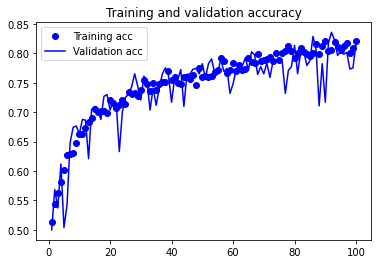

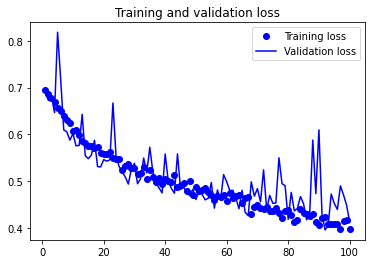

In [25]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show

작은 이미지 데이터셋에 딥러닝을 적용하는 일반적이고 효과적인 방법은 사전 훈련된 네트워크를 사용하는 것이다. 사전 훈련된 네트워크를 사용하는 것에믄 특성 추출과 미세조정 두 가지 방법이 있다.

In [26]:
#VGG16합성곱 기반 층 만들기
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [27]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

최종 특성맵의 크기는 (4,4,512)이고 이 위에 완전 연결 층을 놓을 것인데 여기에는 두 가지 방법이 있다.

1. 새로운 데이터셋에서 합성곱 기반 층을 실행하고 출력을 넘파이 배열로 디스크에 저장한다. 그 후 이 데이터를 독립된 완전연결 분류기에 입력으로 사용한다. (모든 입력 이미지에 대해 합성곱 기반 층을 한번만 실행하면 되기에 빠르고 비용이 적게 들지만 데이터 증식은 불가능)
2. 준비한 모델 (conv_base)위에 Dense층을 쌓아 확장함. 그 후 입력데이터에서 엔드 투 엔드로 전체 모델을 실행함. 모델에 노출된 모든 입력 이미지가 매번 합성곱 기반 층을 통과하기 때문에 데이터 증식을 사용할 수 있음. (첫번째 방식보다는 비용이 더 많이 듬)

In [28]:
#데이터 증식을 사용하지 않는 빠른 특성추출-사전훈련된 합성곱 기반 층을 사용한 특성추출
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/dataset/dogs-vs-cats_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어내므로 모든 이미지를 한 번씩 처리하고 나면 중지합니다
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [29]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [30]:

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
100/100 [==============================] - 1s 5ms/step - loss: 0.6155 - accuracy: 0.6645 - val_loss: 0.4427 - val_accuracy: 0.8430
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 0.4416 - accuracy: 0.7985 - val_loss: 0.3738 - val_accuracy: 0.8540
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3558 - accuracy: 0.8400 - val_loss: 0.3272 - val_accuracy: 0.8800
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3177 - accuracy: 0.8635 - val_loss: 0.3197 - val_accuracy: 0.8640
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3016 - accuracy: 0.8735 - val_loss: 0.2909 - val_accuracy: 0.8810
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2743 - accuracy: 0.8865 - val_loss: 0.2744 - val_accuracy: 0.8990
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2609 - accuracy: 0.8915 - val_loss: 0.2903 - val_accuracy: 0.8730
Epoch 

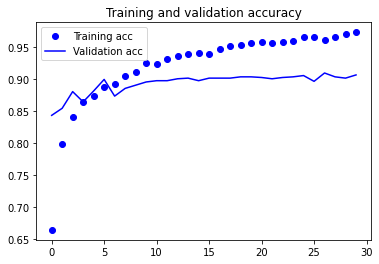

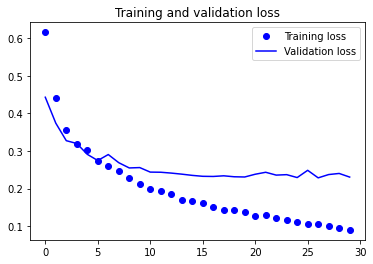

In [31]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

데이터 증식을 사용한 특성 추출
훨씬 느리고 비용이 많이 들기 때문에 GPU를 사용할수 있을 때 시도해야 함, 훈련하는 동안 데이터 증식기법을 사용할 수 있다.

In [32]:
#합성곱 기반 층 위에 완전연결 분류기 추가
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [34]:
print('conv_base를 동결하기 전 훈련되는 가중치의 수:', len(model.trainable_weights))

conv_base를 동결하기 전 훈련되는 가중치의 수: 30


모델을 컴파일하고 훈련하기 전에 합성곱 기반층을 동결하는 것이 아주 중요하다(동결: 훈련동안 가중치 업데이트가 되지 않게 막는다) 이렇게 하지 않으면 사전에 학습된 표현이 훈련하는 동안 수정될 것이다.맨 위 Dense층은 랜덤하게 초기화되었기 때문에 매우 큰 가중치 업데이트 값이 네트워크에 전파되는데 이는 사전에 학습된 표현을 크게 훼손한다. 케라스에서는 trainable속성을 False로 설정해 네트워크를 동결시킬 수 있다.

In [35]:
conv_base.trainable=False

In [36]:
print('conv_base를 동결한 후 훈련되는 가중치의 수:', len(model.trainable_weights))

conv_base를 동결한 후 훈련되는 가중치의 수: 4


이러면 추가한 2개의 Dense층 가중치만 훈련될 것이다. 층마다 2개씩 총 4개의 텐서가 훈련된다. 또한 반드시 다시 컴파일해야 한다

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하므로 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 - 24s - loss: 0.0277 - accuracy: 0.9955 - val_loss: 0.8558 - val_accuracy: 0.8950
Epoch 2/30
100/100 - 21s - loss: 0.0132 - accuracy: 0.9970 - val_loss: 0.4026 - val_accuracy: 0.9360
Epoch 3/30
100/100 - 21s - loss: 0.0150 - accuracy: 0.9970 - val_loss: 0.4184 - val_accuracy: 0.9310
Epoch 4/30
100/100 - 23s - loss: 0.0119 - accuracy: 0.9965 - val_loss: 0.4685 - val_accuracy: 0.9280
Epoch 5/30
100/100 - 21s - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.3963 - val_accuracy: 0.9330
Epoch 6/30
100/100 - 21s - loss: 0.0122 - accuracy: 0.9955 - val_loss: 0.3885 - val_accuracy: 0.9300
Epoch 7/30
100/100 - 22s - loss: 0.0068 - accuracy: 0.9980 - val_loss: 0.3803 - val_accuracy: 0.9360
Epoch 8/30
100/100 - 21s - loss: 0.0121 - accuracy: 0.9955 - val_loss: 0.4121 - val_accuracy: 0.9310
Epoch 9/30
100/100 - 21s - loss: 0.0138 - accuracy: 0.9975 - val_loss: 0.4248 - val_accuracy: 0.9280
Epoch 10/30
100/100 - 22s - loss: 0.0201 - accuracy: 0.9965 - val_loss: 0.3933 - val_accura

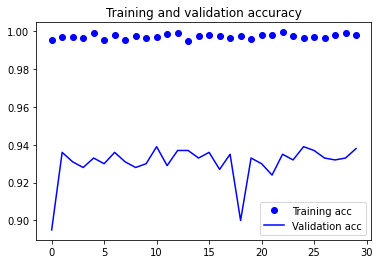

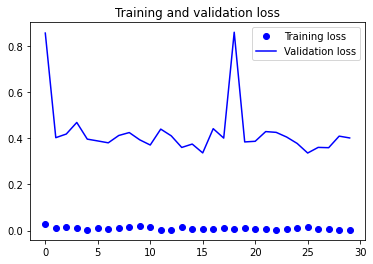

In [45]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

5.3.2 미세조정

모델을 재사용하는데 널리 사용되는 또다른 기법으로 특성추출을 보완한다. 특성추출에 사용했던 동결모델의 상위 층 몇개를 동결에서 해제하고 모델에 새로 추가한 층(여기서는 완전 연결 분류기)와 함께 훈련하는 것 이다. 주어진 문제에 조금 더 밀접하게 재사용 모델의 표현을 일부 조정하기 때문에 미세조정이라고 부른다.

In [39]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [40]:
#특정 층까지 모든 층 동결

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

네트워크 미세 조정 시작, 학습률을 낮춘 RMSprop 옵티마이저를 사용하는데 학습률을 낮추는 것은 미세조정하는 3개의 층에서 학습된 표현을 조금씩 수정하기 위함

In [41]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 24s 228ms/step - loss: 0.1923 - accuracy: 0.9265 - val_loss: 0.2218 - val_accuracy: 0.9130
Epoch 2/100
100/100 [==============================] - 22s 218ms/step - loss: 0.1571 - accuracy: 0.9390 - val_loss: 0.2615 - val_accuracy: 0.8990
Epoch 3/100
100/100 [==============================] - 23s 233ms/step - loss: 0.1316 - accuracy: 0.9440 - val_loss: 0.2318 - val_accuracy: 0.9160
Epoch 4/100
100/100 [==============================] - 22s 222ms/step - loss: 0.1232 - accuracy: 0.9525 - val_loss: 0.2238 - val_accuracy: 0.9160
Epoch 5/100
100/100 [==============================] - 22s 218ms/step - loss: 0.1097 - accuracy: 0.9585 - val_loss: 0.2173 - val_accuracy: 0.9190
Epoch 6/100
100/100 [==============================] - 24s 237ms/step - loss: 0.0915 - accuracy: 0.9610 - val_loss: 0.2179 - val_accuracy: 0.9220
Epoch 7/100
100/100 [==============================] - 23s 231ms/step - loss: 0.0801 - accuracy: 0.9680 - val_loss: 0.2080 -

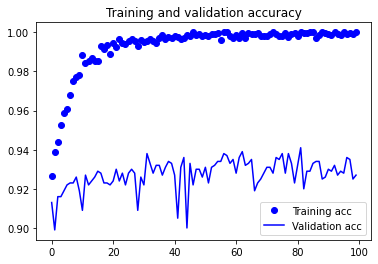

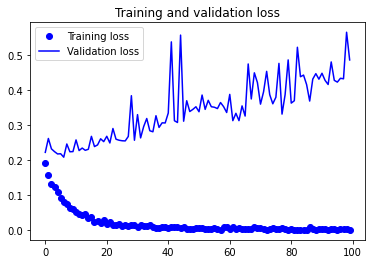

In [43]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()